# Example of Adversarial Mixuture of Logistic Regression Models

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mixture_of_logistic_models import MixtureOfLogits
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
data = pd.read_table('mountain_car_demo.txt', sep=' ', header=0,names=['pos', 'vel', 'action', 'reward'], skiprows=1, index_col=False)
data

,pos,vel,action,reward
0,-0.422633,-0.001758,0.0,-1.0
1,-0.426137,-0.003504,0.0,-1.0
2,-0.431361,-0.005225,0.0,-1.0
3,-0.438269,-0.006908,0.0,-1.0
4,-0.446809,-0.008541,0.0,-1.0
...,...,...,...,...
1247,0.344660,0.035769,2.0,-1.0
1248,0.380151,0.035491,2.0,-1.0
1249,0.415599,0.035448,2.0,-1.0
1250,0.451251,0.035652,2.0,-1.0


In [3]:
import matplotlib
matplotlib.__version__

'3.1.3'

### Original Data

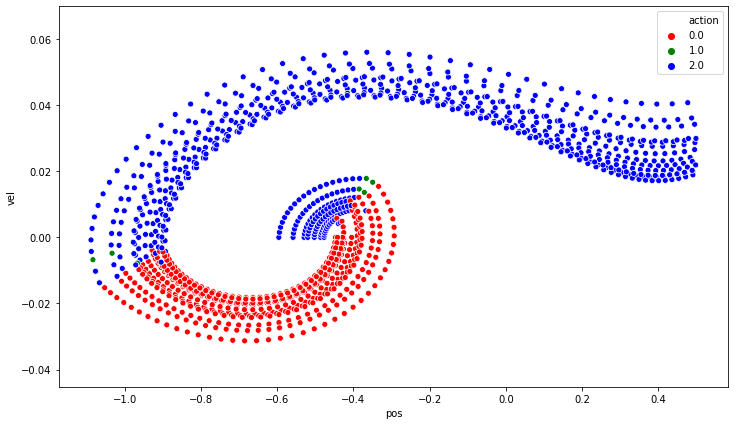

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(data.pos, data.vel, hue=data.action, palette=['red', 'green', 'blue' ])

## Corrupt Data

In [5]:
demos  = pd.read_table('mountain_car_demo.txt',header=None,sep=' ', nrows=1)
demos = demos.drop(13, axis=1)
data['demo'] = 0
demos[0] -=1
cnt = 0
for column in demos.columns:
    for i in range(cnt, cnt+demos[column][0]):
        data.at[i, 'demo'] = column
        if column in [0, 1, 2, 3]:
            if data.at[i, 'action'] == 0:
                data.at[i, 'action'] = 2
            else:
                data.at[i, 'action'] = 0
    cnt += demos[column][0]

In [6]:
colors = np.array(['red', 'green', 'blue'])
colors[np.unique(data.action).astype(int)]


array(['red', 'green', 'blue'], dtype='<U5')

### Corrupted Data

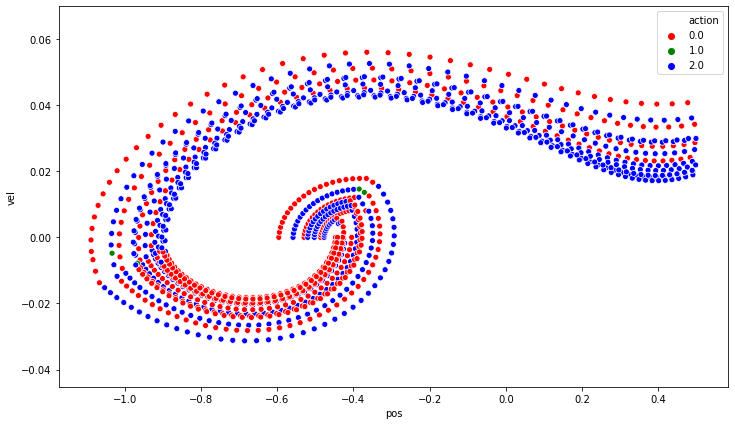

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(data.pos, data.vel, hue=data.action, palette=list(colors[np.unique(data.action).astype(int)]))

## Assuming Correct Demonstrations

In [8]:
X = data.drop(['action', 'reward'], axis=1).to_numpy()
y = data.action.to_numpy()

In [9]:
model = LogisticRegression(
                        penalty='none',
                        multi_class='multinomial',
                        fit_intercept=True,
                        n_jobs=-1
                    ).fit(X, y)

In [10]:
model.predict( data.drop(['reward', 'action'], axis=1))

array([0., 0., 0., ..., 2., 2., 2.])

### Results 

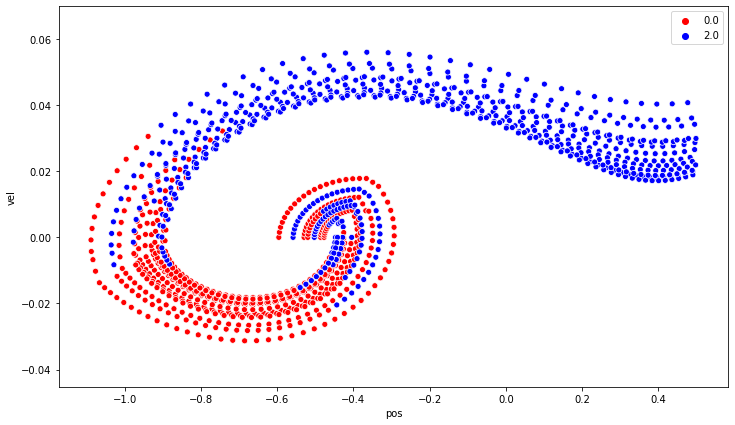

In [11]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(
    data.pos,
    data.vel,
    hue=model.predict( data.drop(['reward', 'action'], axis=1)),
    palette=list(colors[np.unique(model.predict(data.drop(['reward', 'action'], axis=1))).astype(int)])
)

## Assuming we have two demonstrators

In [12]:
demos = [
    [0, 84],
    [85, 190],
    [191, 293],
    [294, 398],
    [399, 487],
    [488, 591],
    [592, 693],
    [694, 777],
    [778, 867],
    [868, 954],
    [955, 1057],
    [1058, 1146],
    [1147, 1251]
]
model = MixtureOfLogits().fit(X, y, demos, 7)

In [13]:
model1, model2 = model.result()

### Result for Model1

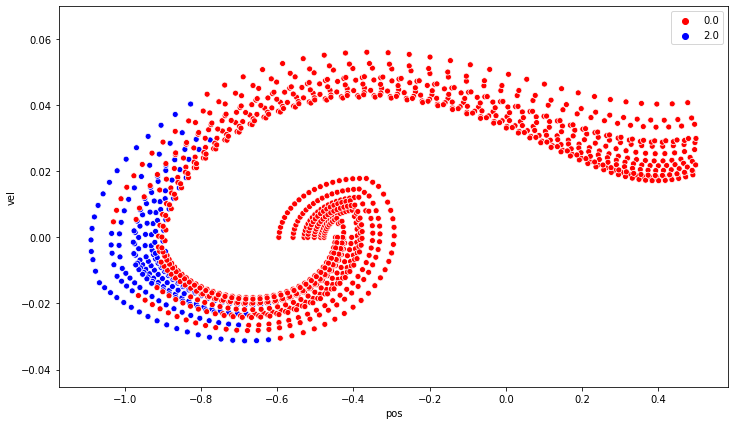

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(
    data.pos,
    data.vel,
    hue=model1.predict( data.drop(['reward', 'action'], axis=1)),
    palette=['red', 'blue'])

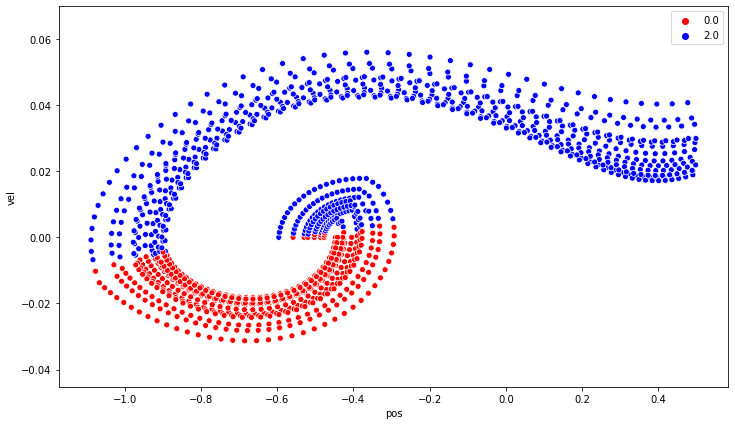

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(
    data.pos,
    data.vel,
    hue=model2.predict( data.drop(['reward', 'action'], axis=1)),
    palette=['red',  'blue'])

In [16]:
a = np.ones((3, 2))
b = np.array([[1, 2],[1, 2],[1, 2]])
np.multiply(a, b)

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [17]:
gammas = model.gammas
for i, demo in enumerate(demos):
    print('Gamma model 1 for demo ' + str(i) + ': ' + str(np.unique(gammas[i][0][demo[0]:demo[1]+1])))
    #print('Gamma model 2 for demo ' + str(i) + ': ' + str(np.unique(gammas[i][1][demo[0]:demo[1]+1])))

Gamma model 1 for demo 0: [0.00269828]
Gamma model 1 for demo 1: [1.]
Gamma model 1 for demo 2: [1.]
Gamma model 1 for demo 3: [1.]
Gamma model 1 for demo 4: [2.07289882e-35]
Gamma model 1 for demo 5: [6.55906898e-41]
Gamma model 1 for demo 6: [7.88430485e-38]
Gamma model 1 for demo 7: [1.33398114e-39]
Gamma model 1 for demo 8: [1.42010098e-41]
Gamma model 1 for demo 9: [1.84023646e-45]
Gamma model 1 for demo 10: [2.79420355e-40]
Gamma model 1 for demo 11: [1.83376522e-49]
Gamma model 1 for demo 12: [3.24542519e-66]


In [18]:
for i, demo in enumerate(demos):
    #print('Gamma model 1 for demo ' + str(i) + ': ' + str(np.unique(gammas[i][0][demo[0]:demo[1]+1])))
    print('Gamma model 2 for demo ' + str(i) + ': ' + str(np.unique(gammas[i][1][demo[0]:demo[1]+1])))

Gamma model 2 for demo 0: [0.99730172]
Gamma model 2 for demo 1: [5.43765553e-31]
Gamma model 2 for demo 2: [0.]
Gamma model 2 for demo 3: [0.]
Gamma model 2 for demo 4: [1.]
Gamma model 2 for demo 5: [1.]
Gamma model 2 for demo 6: [1.]
Gamma model 2 for demo 7: [1.]
Gamma model 2 for demo 8: [1.]
Gamma model 2 for demo 9: [1.]
Gamma model 2 for demo 10: [1.]
Gamma model 2 for demo 11: [1.]
Gamma model 2 for demo 12: [1.]


### Now we assume that one demonstrator is adversarial

In [19]:
from mixture_of_logistic_models import AdversarialLogits, Expert_, Adversary_

In [20]:
model = AdversarialLogits().fit(X, y, demos, 0.001)
expert, adversary = model.result()

[0.35229167 0.34339694 0.33457734 ... 0.82639121 0.82914319 0.83265936]
[0.15002372 0.07026287 0.03210344 ... 0.99873739 0.99877553 0.99885067]
[0.15002373 0.07026288 0.03210344 ... 0.99873739 0.99877552 0.99885067]
[0.15002372 0.07026287 0.03210344 ... 0.99873738 0.99877551 0.99885066]
[0.1500237  0.07026286 0.03210344 ... 0.99873737 0.9987755  0.99885065]
[0.15002368 0.07026285 0.03210343 ... 0.99873736 0.9987755  0.99885065]
[0.15002366 0.07026284 0.03210343 ... 0.99873735 0.99877549 0.99885064]
[0.15002364 0.07026283 0.03210342 ... 0.99873734 0.99877548 0.99885063]
[0.15002359 0.0702628  0.03210341 ... 0.99873733 0.99877547 0.99885062]
[0.15002327 0.07026264 0.03210333 ... 0.9987373  0.99877544 0.99885059]
[0.15002313 0.07026257 0.0321033  ... 0.99873734 0.99877547 0.99885063]
[0.15002299 0.0702625  0.03210326 ... 0.99873732 0.99877546 0.99885061]
[0.15002291 0.07026245 0.03210324 ... 0.99873734 0.99877547 0.99885062]
[0.15002288 0.07026244 0.03210323 ... 0.99873733 0.99877547 0.99

In [21]:
expert.model.coef_.shape, expert.model.intercept_.shape

((3, 3), (3,))

In [22]:
gamma = expert.gamma
for i, demo in enumerate(demos):
    print('Gamma model 1 for demo ' + str(i) + ': ' + str(np.unique(gamma[demo[0]:demo[1]+1])))

Gamma model 1 for demo 0: [0.]
Gamma model 1 for demo 1: [0.]
Gamma model 1 for demo 2: [0.]
Gamma model 1 for demo 3: [0.]
Gamma model 1 for demo 4: [1.]
Gamma model 1 for demo 5: [1.]
Gamma model 1 for demo 6: [1.]
Gamma model 1 for demo 7: [1.]
Gamma model 1 for demo 8: [1.]
Gamma model 1 for demo 9: [1.]
Gamma model 1 for demo 10: [1.]
Gamma model 1 for demo 11: [1.]
Gamma model 1 for demo 12: [1.]


In [23]:
gamma = adversary.gamma
for i, demo in enumerate(demos):
    print('Gamma model 1 for demo ' + str(i) + ': ' + str(np.unique(gamma[demo[0]:demo[1]+1])))

Gamma model 1 for demo 0: [1.]
Gamma model 1 for demo 1: [1.]
Gamma model 1 for demo 2: [1.]
Gamma model 1 for demo 3: [1.]
Gamma model 1 for demo 4: [8.14426844e-241]
Gamma model 1 for demo 5: [2.31887817e-287]
Gamma model 1 for demo 6: [1.47305164e-246]
Gamma model 1 for demo 7: [6.22438933e-253]
Gamma model 1 for demo 8: [7.86902034e-215]
Gamma model 1 for demo 9: [4.89871084e-222]
Gamma model 1 for demo 10: [7.07017161e-253]
Gamma model 1 for demo 11: [8.64098146e-201]
Gamma model 1 for demo 12: [2.65618422e-256]


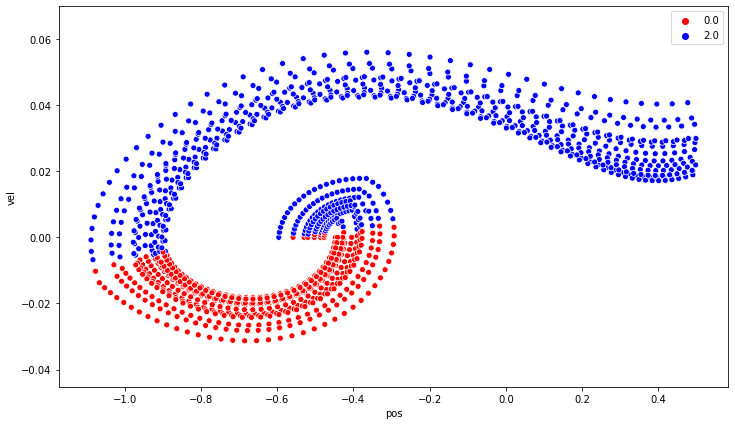

In [24]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(
    data.pos,
    data.vel,
    hue=expert.model.predict( data.drop(['reward', 'action'], axis=1)),
    palette=['red',  'blue'])